### Problem Statement

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


Data Description:
    
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


In [6]:
# Importing the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster import hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Loading the data set

df = pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
df = df.drop('Unnamed: 0', axis = 1)

In [9]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [10]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [12]:
# Applying feature scaling

minmax = MinMaxScaler()
df_scaled = minmax.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


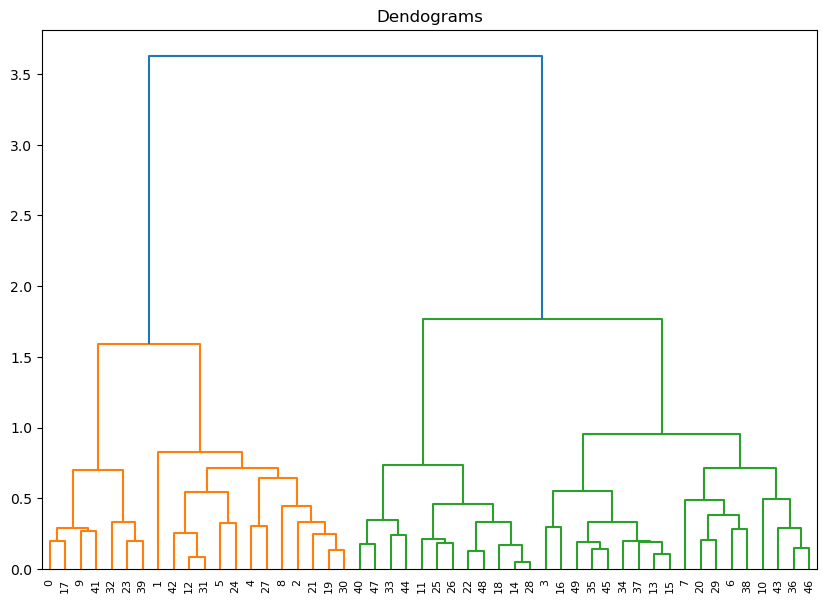

In [13]:
plt.figure(figsize = (10,7))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(df_scaled, method = 'ward' ))

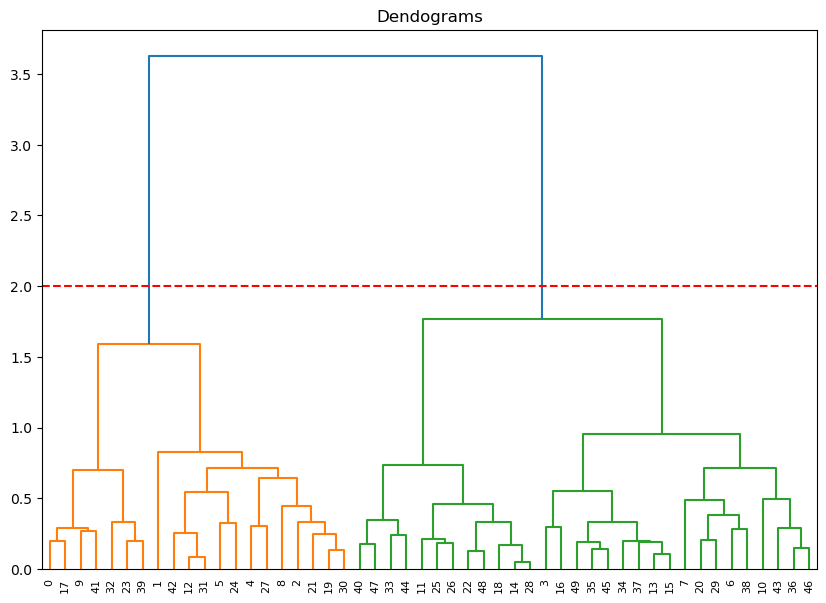

In [14]:
plt.figure(figsize = (10,7))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(df_scaled, method = 'ward' ))
plt.axhline(y=2, color = 'r', linestyle = '--')

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
no_clusters= [2,3,4,5,6,7,8,9]
linkage=["ward", "complete", "average", "single"]
for num in no_clusters:
    for link in linkage:
        cluster= AgglomerativeClustering(n_clusters=num, linkage=link, affinity='euclidean')
        clus_label = cluster.fit_predict(df_scaled)
        silt_score= silhouette_score(df_scaled, clus_label)
        print(f"Silhouette score with clusters {num} and linkage {link} is {silt_score}")

Silhouette score with clusters 2 and linkage ward is 0.42364457559625074
Silhouette score with clusters 2 and linkage complete is 0.42364457559625074
Silhouette score with clusters 2 and linkage average is 0.42364457559625074
Silhouette score with clusters 2 and linkage single is 0.21033337025958487
Silhouette score with clusters 3 and linkage ward is 0.31916915428121284
Silhouette score with clusters 3 and linkage complete is 0.30877213909512063
Silhouette score with clusters 3 and linkage average is 0.35149572430421583
Silhouette score with clusters 3 and linkage single is 0.14223288708185444
Silhouette score with clusters 4 and linkage ward is 0.3298707379986785
Silhouette score with clusters 4 and linkage complete is 0.3060729442426308
Silhouette score with clusters 4 and linkage average is 0.36992391140277175
Silhouette score with clusters 4 and linkage single is -0.1674119195474404
Silhouette score with clusters 5 and linkage ward is 0.28290124293256447
Silhouette score with clus

Selecting number of clusters 4 and linkage average for the highest Silhouette score 0.36992391140277175

In [30]:
cluster = AgglomerativeClustering(n_clusters = 4, linkage = 'ward') # with trial and error
Labels = cluster.fit_predict(df_scaled)
df1 = df_scaled.copy()
df1['Clusters'] = Labels
df1.head()

,Murder,Assault,UrbanPop,Rape,Clusters
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1


<AxesSubplot:xlabel='Clusters', ylabel='count'>

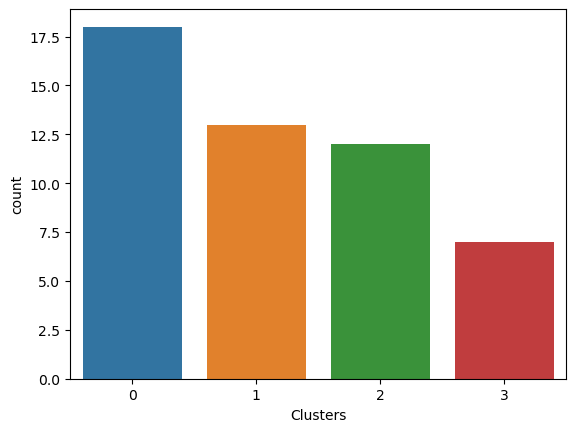

In [31]:
sns.countplot(x="Clusters", data=df1)

In [44]:
# Applying PCA

from sklearn.decomposition import PCA

In [45]:
pca = PCA()
pca_fitted=pca.fit_transform(df_scaled)

In [46]:
no_clusters= [2,3,4,5,6,7,8,9]
linkage=["ward", "complete", "average", "single"]
for num in no_clusters:
    for link in linkage:
        cluster= AgglomerativeClustering(n_clusters=num, linkage=link, affinity='euclidean')
        clus_label = cluster.fit_predict(pca_fitted)
        silt_score= silhouette_score(pca_fitted, clus_label)
        print(f"Silhouette score with clusters {num} and linkage {link} is {silt_score}")

Silhouette score with clusters 2 and linkage ward is 0.42364457559625074
Silhouette score with clusters 2 and linkage complete is 0.42364457559625074
Silhouette score with clusters 2 and linkage average is 0.42364457559625074
Silhouette score with clusters 2 and linkage single is 0.21033337025958487
Silhouette score with clusters 3 and linkage ward is 0.31916915428121295
Silhouette score with clusters 3 and linkage complete is 0.30877213909512075
Silhouette score with clusters 3 and linkage average is 0.35149572430421583
Silhouette score with clusters 3 and linkage single is 0.14223288708185433
Silhouette score with clusters 4 and linkage ward is 0.32987073799867866
Silhouette score with clusters 4 and linkage complete is 0.30607294424263093
Silhouette score with clusters 4 and linkage average is 0.36992391140277175
Silhouette score with clusters 4 and linkage single is -0.16741191954744067
Silhouette score with clusters 5 and linkage ward is 0.28290124293256447
Silhouette score with c

In [47]:
cluster = AgglomerativeClustering(n_clusters= 4, linkage= 'ward')
labels= cluster.fit_predict(df_scaled)
df2= df_scaled.copy()
df2["clusters"]= labels
df2.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1


<AxesSubplot:xlabel='clusters', ylabel='count'>

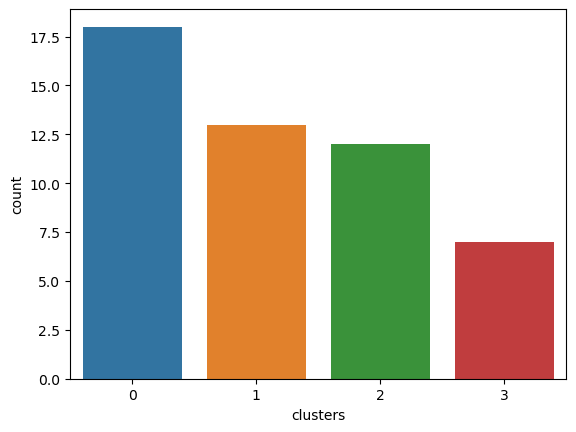

In [48]:
sns.countplot(x="clusters", data=df2)